<a href="https://colab.research.google.com/github/rizkyaldiansyah123/Preprocessing_G.231.22.0016/blob/main/TS_G_231_22_0016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log
from math import exp
from scipy.stats import boxcox
from pandas import DataFrame
from pandas import Grouper
from pandas import Series
from pandas import concat
from pandas.plotting import lag_plot
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.gofplots import qqplot

In [11]:
import pandas as pd

# Membaca file CSV dan menyimpan dalam variabel series
series = pd.read_csv('/content/AirPassengers.csv', header=0, index_col=0, parse_dates=True)

# Menampilkan lima baris pertama dari data
print(series.head())


            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [12]:
print(series.describe())

       #Passengers
count   144.000000
mean    280.298611
std     119.966317
min     104.000000
25%     180.000000
50%     265.500000
75%     360.500000
max     622.000000


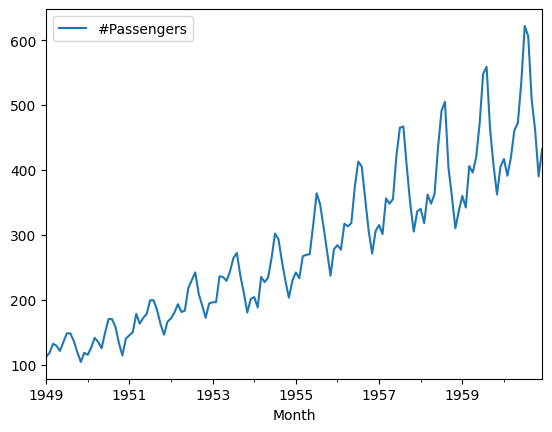

In [22]:
#visualisasi nilai pada plot garis, yang dapat memberikan banyak wawasan tentang masalah tersebut
series.plot()
pyplot.show()

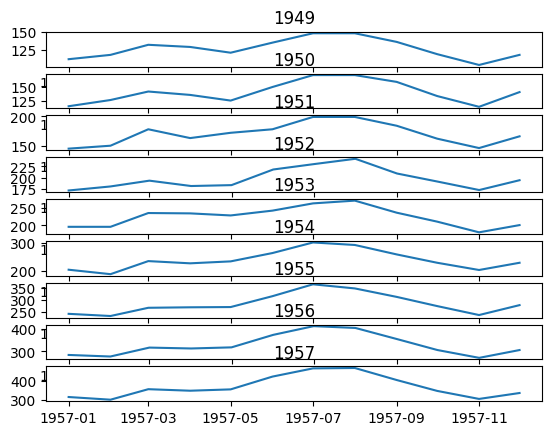

In [21]:
import pandas as pd
from pandas import DataFrame, Grouper
import matplotlib.pyplot as plt

# Membaca file CSV dan menyimpan dalam variabel series
series = pd.read_csv('/content/AirPassengers.csv', header=0, index_col=0, parse_dates=True)

# Mengelompokkan data berdasarkan tahun
groups = series['1949':'1957'].groupby(Grouper(freq='A'))

# Menyimpan data dalam DataFrame baru
years = DataFrame()
plt.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
    plt.subplot(n_groups, 1, i)  # Membuat subplot untuk setiap grup
    plt.plot(group)              # Memplot data grup
    plt.title(name.year)         # Menambahkan judul untuk setiap subplot
    i += 1
plt.show()


<ipython-input-15-ba521902c209>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  pyplot.subplot(212)


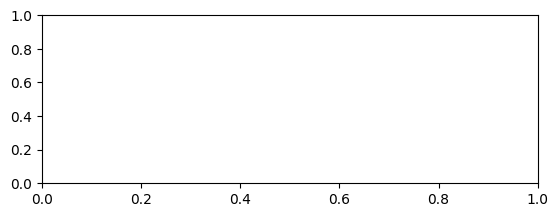

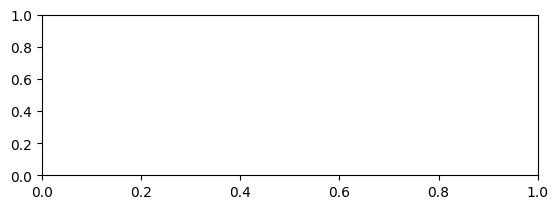

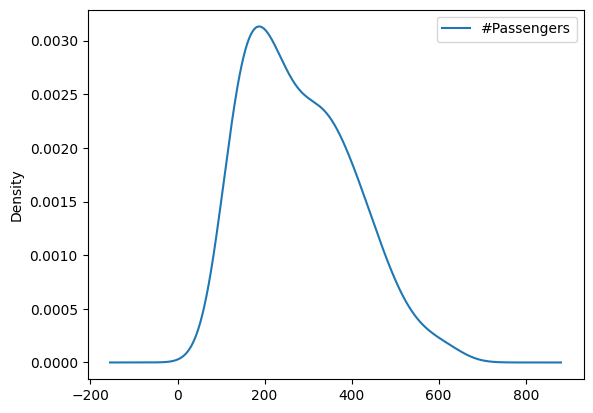

In [15]:
#Struktur Data
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

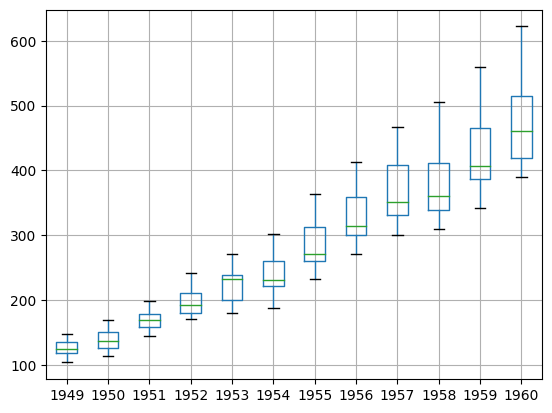

In [20]:
import pandas as pd
from pandas import DataFrame, Grouper
import matplotlib.pyplot as plt

# Membaca file CSV dan menyimpan dalam variabel series
series = pd.read_csv('/content/AirPassengers.csv', header=0, index_col=0, parse_dates=True)

# Mengelompokkan data berdasarkan tahun
groups = series['1949':'1960'].groupby(Grouper(freq='A'))

# Menyimpan data dalam DataFrame baru
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values.flatten()

# Menampilkan boxplot dari data yang telah dikelompokkan
years.boxplot()
plt.show()


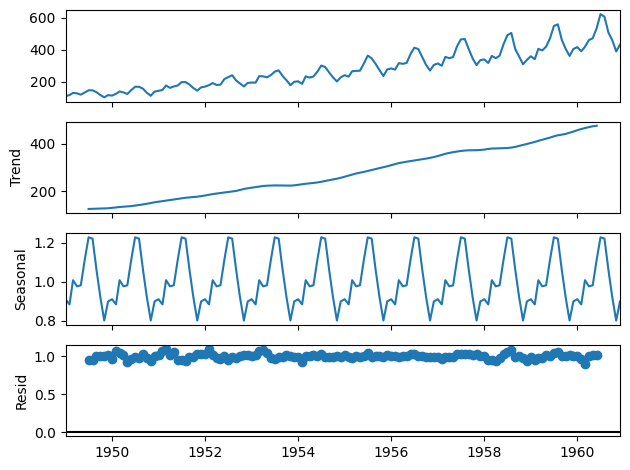

In [17]:
#uraikan deret waktu kejelasan lebih lanjut tentang komponennya - Level, Tren, Musiman, dan Kebisingan.
result = seasonal_decompose(series, model='multiplicative')
result.plot()
pyplot.show()

In [51]:
def test_stationarity(timeseries):

    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


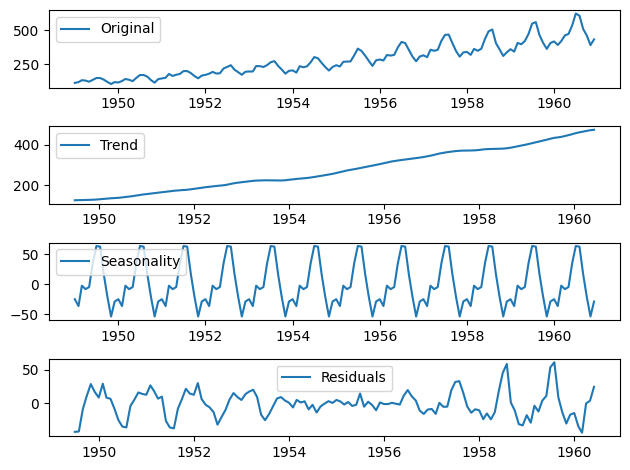

In [27]:
import matplotlib.pylab as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(series)
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


In [25]:
decomp_data = residual
decomp_data = decomp_data.dropna()
print(decomp_data)


Month
1949-07-01   -42.622475
1949-08-01   -42.073232
1949-09-01    -8.478535
1949-10-01    11.059343
1949-11-01    28.593434
                ...    
1960-02-01   -34.186869
1960-03-01   -43.967172
1960-04-01    -0.296717
1960-05-01     3.756313
1960-06-01    24.555556
Name: resid, Length: 132, dtype: float64


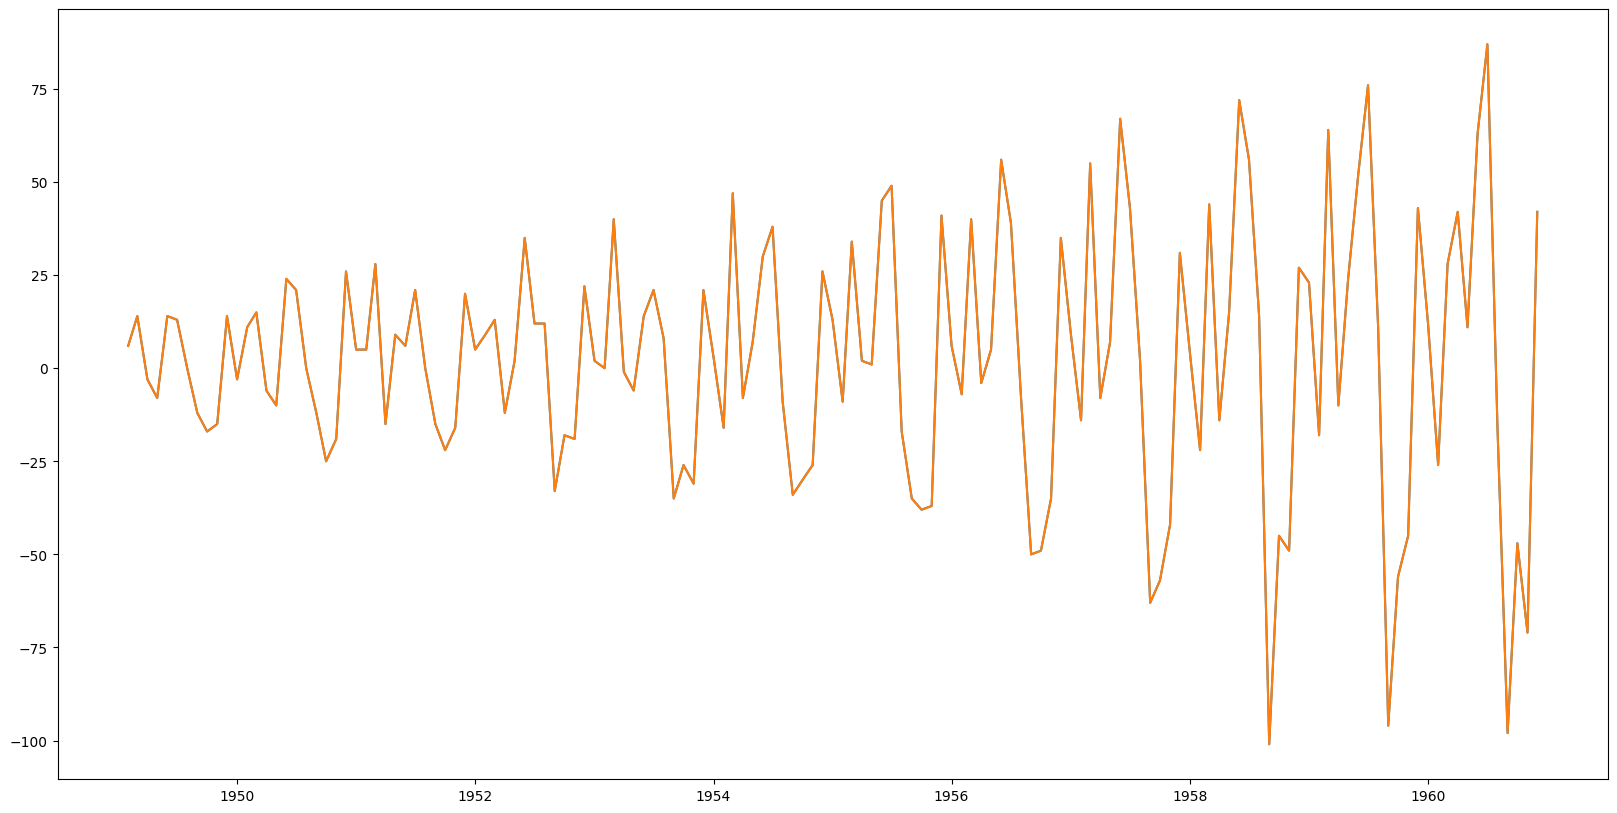

In [30]:
plt.figure(figsize=(20,10))
data_shift = series - series.shift()
plt.plot(data_shift)
data_shift.dropna(inplace=True)
plt.plot(data_shift)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


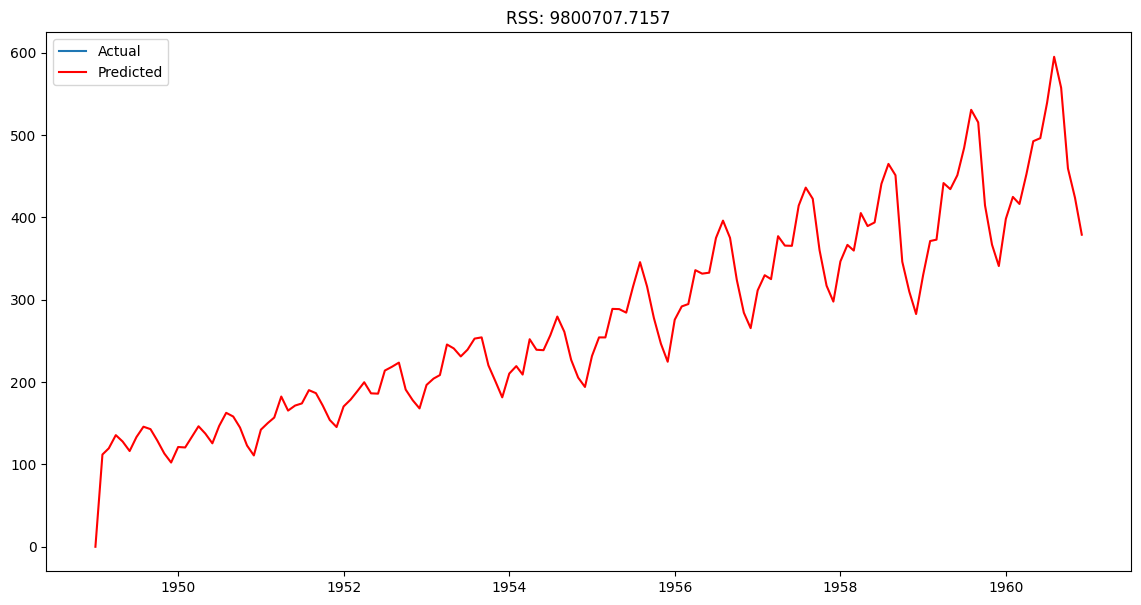

In [50]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Contoh penggunaan model ARIMA
model = ARIMA(series, order=(2, 1, 2))
results = model.fit()

# Menghitung nilai yang diprediksi
fitted_values = results.fittedvalues

# Potong data asli agar panjangnya sesuai dengan nilai yang diprediksi
data_shift_trimmed = data_shift.iloc[len(data_shift) - len(fitted_values):]

# Plot data aktual dan nilai yang diprediksi
plt.figure(figsize=(14, 7))
plt.plot(data_shift_trimmed, label='Actual')
plt.plot(fitted_values, color='red', label='Predicted')
plt.title('ARIMA Predictions')
plt.legend()

# Menghitung dan menampilkan RSS (Residual Sum of Squares)
rss = sum((fitted_values - data_shift_trimmed.values.squeeze())**2)
plt.title(f'RSS: {rss:.4f}')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


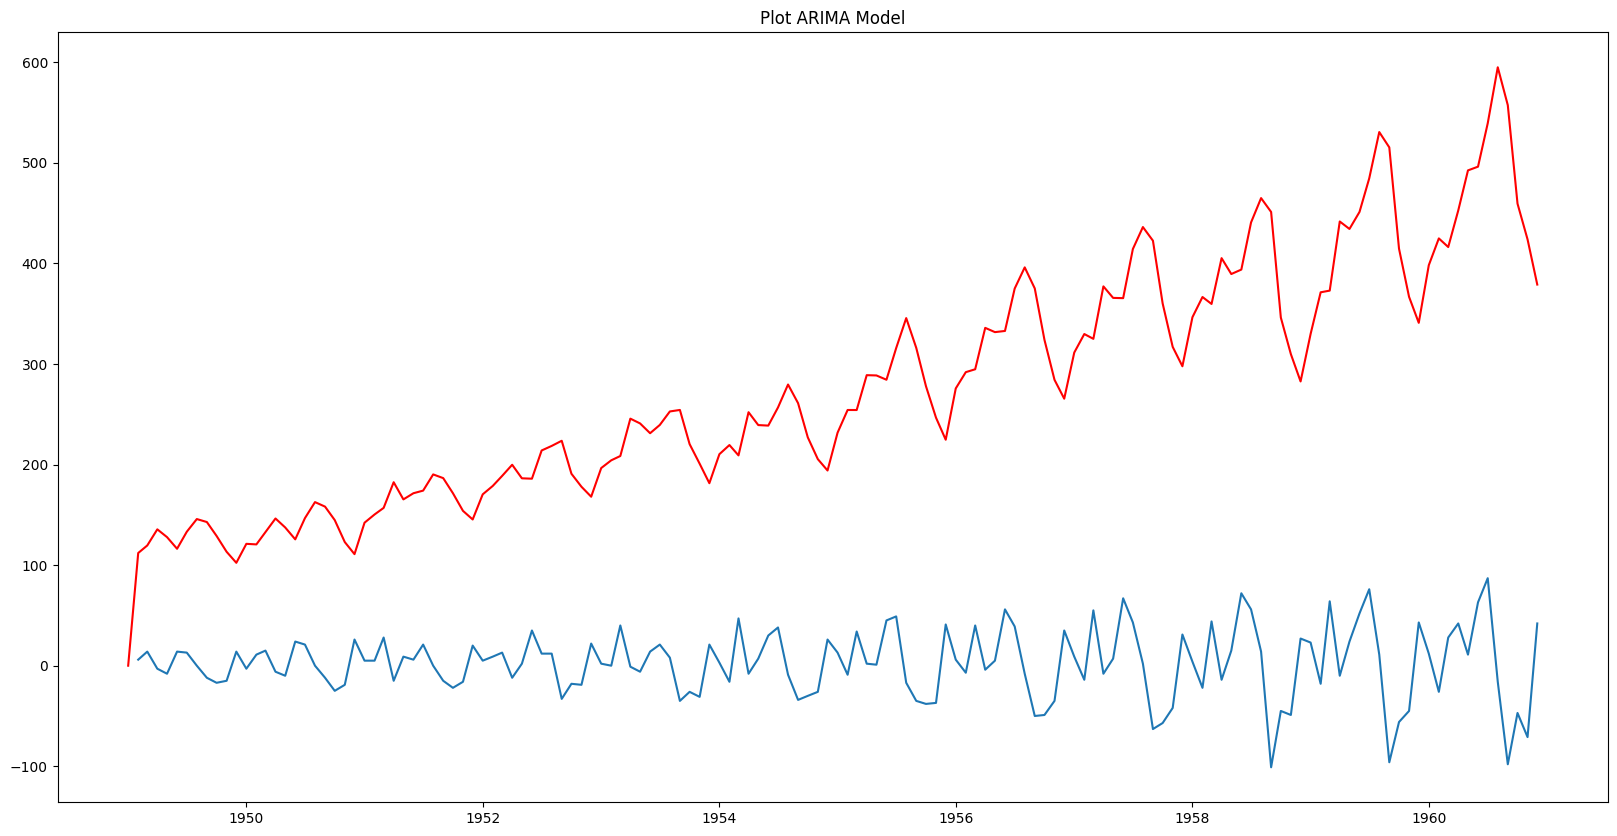

In [43]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

plt.figure(figsize=(20,10))
model = ARIMA(series, order=(2,1,2))
results = model.fit()  # Hapus argumen disp=False
plt.plot(data_shift)
plt.plot(results.fittedvalues, color='red')
plt.title('Plot ARIMA Model')
plt.show()


In [44]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
predictions_ARIMA_diff.head()


Month
1949-01-01      0.000000
1949-02-01    112.032235
1949-03-01    119.536786
1949-04-01    135.567847
1949-05-01    127.820814
dtype: float64

In [45]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-01-01      0.000000
1949-02-01    112.032235
1949-03-01    231.569021
1949-04-01    367.136868
1949-05-01    494.957681
dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


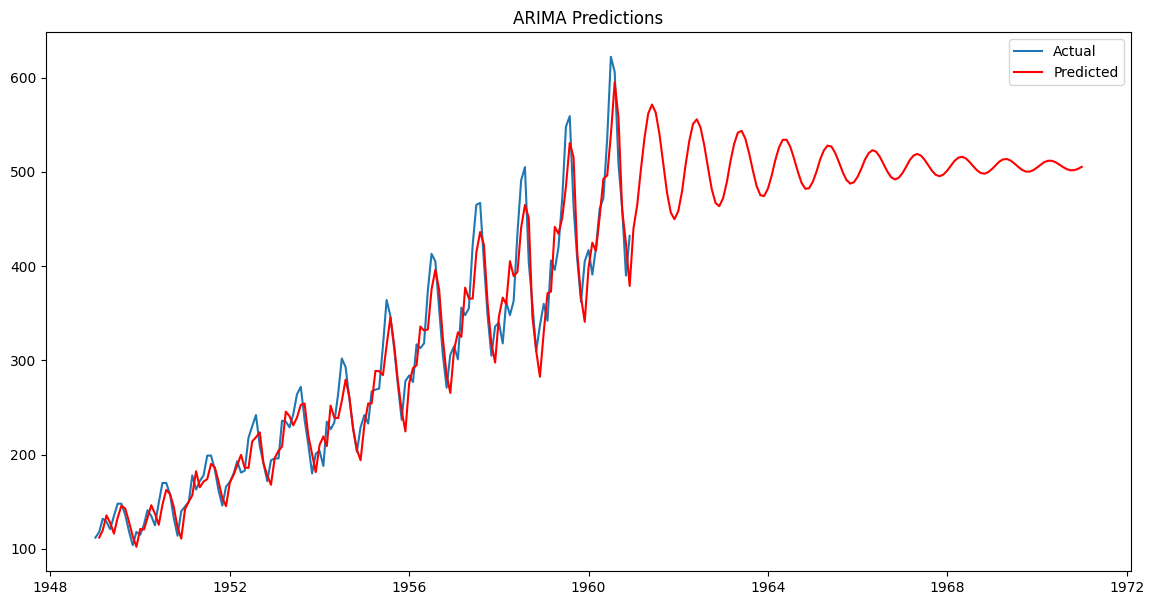

In [47]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Contoh penggunaan model ARIMA
model = ARIMA(series, order=(2, 1, 2))
results = model.fit()

# Menentukan periode prediksi yang ingin diprediksi (misalnya 1 hingga 264)
start_index = 1
end_index = 264

# Melakukan prediksi untuk periode yang ditentukan
predictions = results.predict(start=start_index, end=end_index, dynamic=False)

# Plot data aktual
plt.figure(figsize=(14, 7))
plt.plot(series, label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()
